In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install livelossplot

In [3]:
import numpy as np
import keras
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from livelossplot import PlotLossesKerasTF
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
import random
from sklearn.model_selection import train_test_split

# loading Data

In [4]:
x_test = np.load('/content/drive/MyDrive/csce5210/X_test.npy')
x_train = np.load('/content/drive/MyDrive/csce5210/X_train.npy')
x_validate = np.load('/content/drive/MyDrive/csce5210/X_valid.npy')
y_test = np.load('/content/drive/MyDrive/csce5210/y_test.npy')
y_train = np.load('/content/drive/MyDrive/csce5210/y_train.npy')
y_validate = np.load('/content/drive/MyDrive/csce5210/y_valid.npy')

In [5]:
x_train = x_train.reshape(-1,28,28,1)
x_validate = x_validate.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [6]:
# data normalization
x_train = x_train/255.0
x_validate = x_validate/255.0
x_test = x_test/255.0

In [7]:
label = LabelBinarizer()
y_train = label.fit_transform(y_train)
y_validate = label.fit_transform(y_validate)
y_test = label.fit_transform(y_test)

In [8]:
print("Traning Data")
print(x_train.shape)
print(y_train.shape)
print("Validation Data")
print(x_validate.shape)
print(y_validate.shape)
print("Testing Data")
print(x_test.shape)
print(y_test.shape)

Traning Data
(22542, 28, 28, 1)
(22542, 7)
Validation Data
(7472, 28, 28, 1)
(7472, 7)
Testing Data
(7472, 28, 28, 1)
(7472, 7)


#Training Model 

In [9]:
model = Sequential()

model.add(Conv2D(64,(3,3), padding='same', input_shape=(28, 28,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 128)       5

In [10]:
learn_rate = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=2, min_lr=0.0008, mode='auto')
cp = ModelCheckpoint("/content/drive/MyDrive/csce5210/model_weights.h5", monitor='val_accuracy',save_weights_only=True, mode='max', verbose=1)
cb = [PlotLossesKerasTF(), cp, learn_rate]

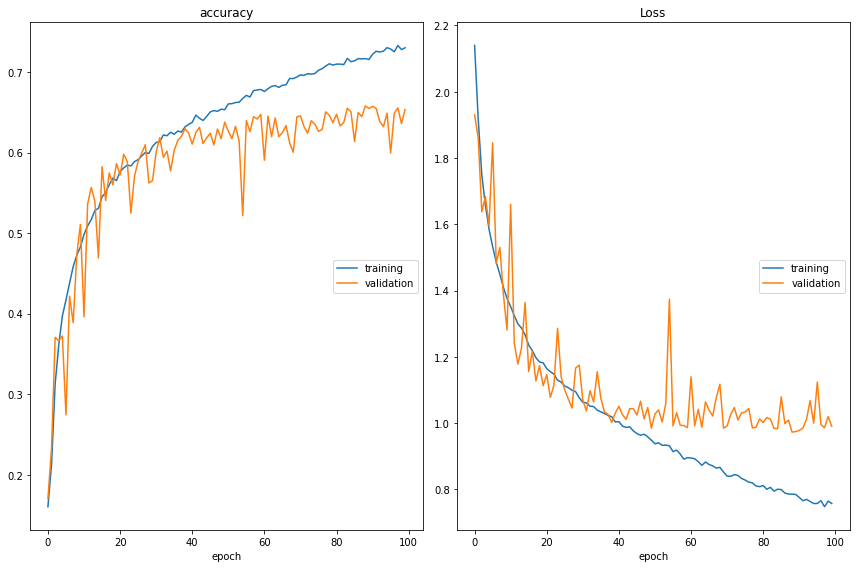

accuracy
	training         	 (min:    0.160, max:    0.733, cur:    0.730)
	validation       	 (min:    0.171, max:    0.658, cur:    0.653)
Loss
	training         	 (min:    0.748, max:    2.140, cur:    0.757)
	validation       	 (min:    0.973, max:    1.930, cur:    0.991)

Epoch 00100: saving model to /content/drive/MyDrive/csce5210/model_weights.h5


In [11]:
history = model.fit(x_train, y_train, batch_size = 32, epochs = 100, verbose = 1, validation_data = (x_validate, y_validate),callbacks=cb)

# Model Evaluation

In [12]:
model.evaluate(x_test,y_test,verbose=0)

[0.9975230693817139, 0.6517665982246399]

In [13]:
pred = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [14]:
y_test=np.argmax(y_test, axis=1)

In [15]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.68      0.49      0.57      1068
           1       0.69      0.87      0.77      1067
           2       0.56      0.47      0.51      1067
           3       0.80      0.80      0.80      1068
           4       0.60      0.55      0.57      1067
           5       0.54      0.64      0.58      1067
           6       0.69      0.75      0.72      1068

    accuracy                           0.65      7472
   macro avg       0.65      0.65      0.65      7472
weighted avg       0.65      0.65      0.65      7472



Text(0.5, 145.31999999999996, 'Predicted label')

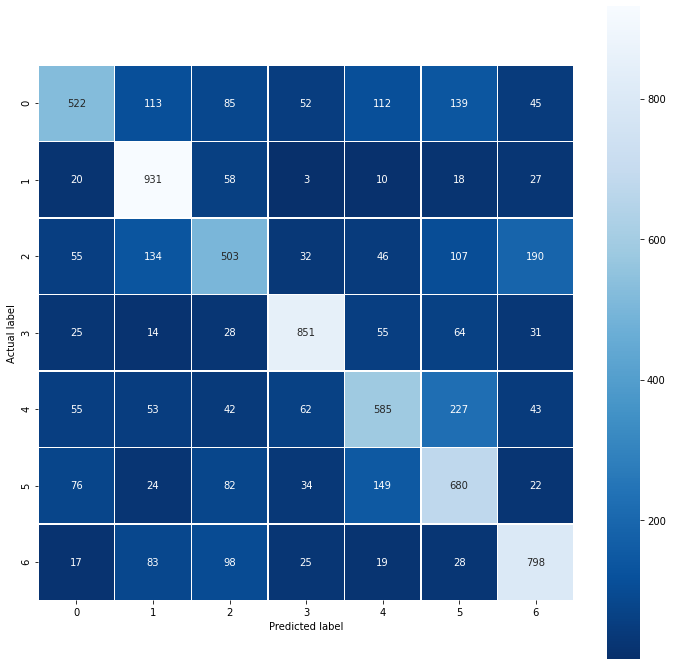

In [16]:
cm = confusion_matrix(y_true=y_test, y_pred = pred)
plt.figure(figsize=(12,12))
sb.heatmap(cm, annot=True,
            linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#plt.title('0: anger , 1: disgust  , 2: fear , 3: happiness , 4: neutrality , 5:sadness , 6: surprise')
#plt.figtext(.02, .02,'0: anger , 1: disgust  , 2: fear , 3: happiness , 4: neutrality , 5:sadness , 6: surprise')

## **0 : anger , 1 : disgust  , 2 : fear   , 3 : happiness  , 4 : neutrality   , 5 : sadness   , 6 : surprise**